In [3]:
import numpy as np
from scipy.signal import StateSpace, lsim, dlsim
import matplotlib.pyplot as plt

StateSpaceContinuous(
array([[ 0.,  1.],
       [-2., -2.]]),
array([[1.],
       [1.]]),
array([[2., 3.]]),
array([[0.]]),
dt: None
)
-0.03230590469414363
StateSpaceDiscrete(
array([[ 0.99065001,  0.09033301],
       [-0.18066602,  0.80998399]]),
array([[0.10435799],
       [0.08098302]]),
array([[2., 3.]]),
array([[0.]]),
dt: 0.1
)
[-0.09691771]


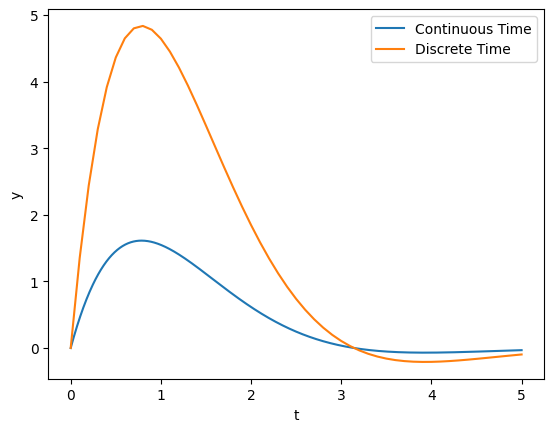

In [8]:
# define the continouse time linear system
A = np.array([[0.0, 1.0], [-2.0, -2.0]]) # need to use float number not integer, a bug of this package
B = np.array([[1.0], [1.0]])
C = np.array([[2.0, 3.0]])
D = np.array([[0.0]])

example_sys_ct = StateSpace(A, B, C, D)

# define simulation steps in time
t_ct = np.linspace(0, 5, num=1000)

# define control input
u_ct = np.ones(t_ct.size)

# convert to discrete time (4.2)
T = 0.1 # second
t_dt = np.linspace(0, 5, num=20)
u_dt = np.ones(t_dt.size)*3
example_sys_dt = example_sys_ct.to_discrete(T)


# simulate the system
_, y_ct, x_ct = lsim(example_sys_ct, u_ct, t_ct, X0 = [0.,0.])
t_dt, y_dt, x_dt = dlsim(example_sys_dt, u_dt, t_dt,  x0 = [0.,0.])

# 4.1
print(example_sys_ct)
print(y_ct[-1]) #this should be y(5)

# 4.2
print(example_sys_dt)
print(y_dt[-1]) #this should be y(5)

# plot 4.3
plt.figure(dpi=100)
plt.plot(t_ct, y_ct)
plt.plot(t_dt, y_dt)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['Continuous Time', 'Discrete Time'])
plt.show()



In [17]:
# q5
a = np.array([[0,1], [1,1]])
b = a

for i in range(0,18):
    b = np.matmul(b, a)
    pow = 2+i

print(f"i and a20 are {pow}, {b}")

i and a20 are 19, [[2584 4181]
 [4181 6765]]
k and a20 are 20, 6765
